<a href="https://colab.research.google.com/github/Kanishkshriv/Paisabazar-fruad-detection/blob/main/Flipkart_Customer_Service_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the Required** **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for data visualisation
import seaborn as sns   #for data visualisation


In [ ]:
from sklearn.model_selection import train_test_split #  splitting the dataset into traning and test sets
from sklearn.ensemble import RandomForestClassifier  #machine learning model for classification
from sklearn.metrics import accuracy_score , classification_report    #TO eevaluate model performance

# **Loading the Dataset**

In [ ]:
#Loading datasheet
file_path = "/content/drive/MyDrive/csv files/Customer_support_data.csv"
df = pd.read_csv(file_path)

# **For Data cleaning and Preprocessing**

In [ ]:
#Converting date and columns to datetime format
date_cols = ["order_date_time" , "Issue_reported at", "issue_responded", "Survey_response_Date"]
for col in date_cols:
  df[col] = pd.to_datetime(df[col], errors = "coerce")         #error = coerce ensures invalid date values are converted to NaT i.e. not a time

<ipython-input-4-28c9b5a05afd>:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors = "coerce")         #error = coerce ensures invalid date values are converted to NaT i.e. not a time
<ipython-input-4-28c9b5a05afd>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors = "coerce")         #error = coerce ensures invalid date values are converted to NaT i.e. not a time


# **Handling missing values**

In [ ]:
#df['Customer Remarks'].fillna("No Remarks", inplace=True)
#df['Item_price'].fillna(df['Item_price'].median(), inplace=True)
#df.drop(columns=['Customer_City', 'connected_handling_time'], inplace=True)  # Too many missing values

df['Customer Remarks'] = df['Customer Remarks'].fillna("No Remarks")     #Filling missing values in customer remarks with no remarks
df['Item_price'] = df['Item_price'].fillna(df['Item_price'].median())    # fills missing values


# **Dropping columns that have too many missing values**

In [ ]:
if 'Customer_City' in df.columns:
    df.drop(columns=['Customer_City'], inplace=True)  # Too many missing values
if 'connected_handling_time' in df.columns:
    df.drop(columns=['connected_handling_time'], inplace=True)

In [ ]:
#Feature enginnering
#Calculating Response time

df["response_time"] = (df["issue_responded"] - df["Issue_reported at"]).dt.total_seconds()
df["response_time"] = df["response_time"].fillna(df["response_time"].median())

## **Analyzing and Visulaizing data**

<ipython-input-8-3e7dbb842e58>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="CSAT Score", data = df , palette = "viridis")


<function matplotlib.pyplot.show(close=None, block=None)>

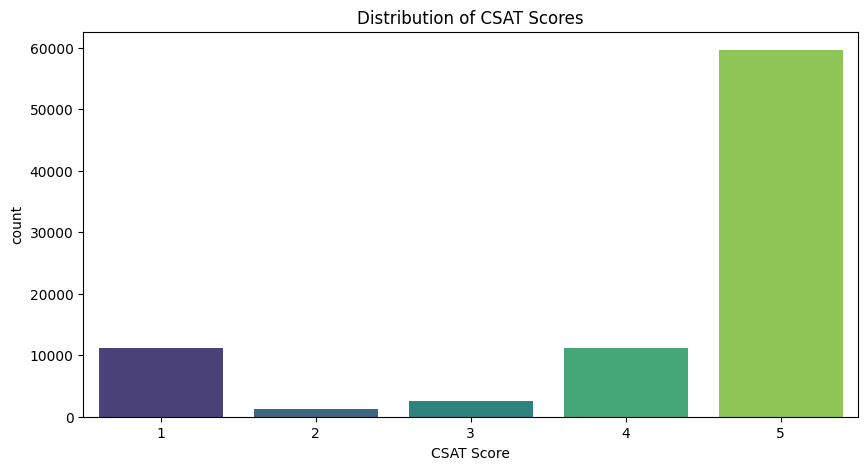

In [ ]:
#For CSAT Score distribution
plt.figure(figsize=(10,5))
sns.countplot(x="CSAT Score", data = df , palette = "viridis")
plt.title("Distribution of CSAT Scores")
plt.show

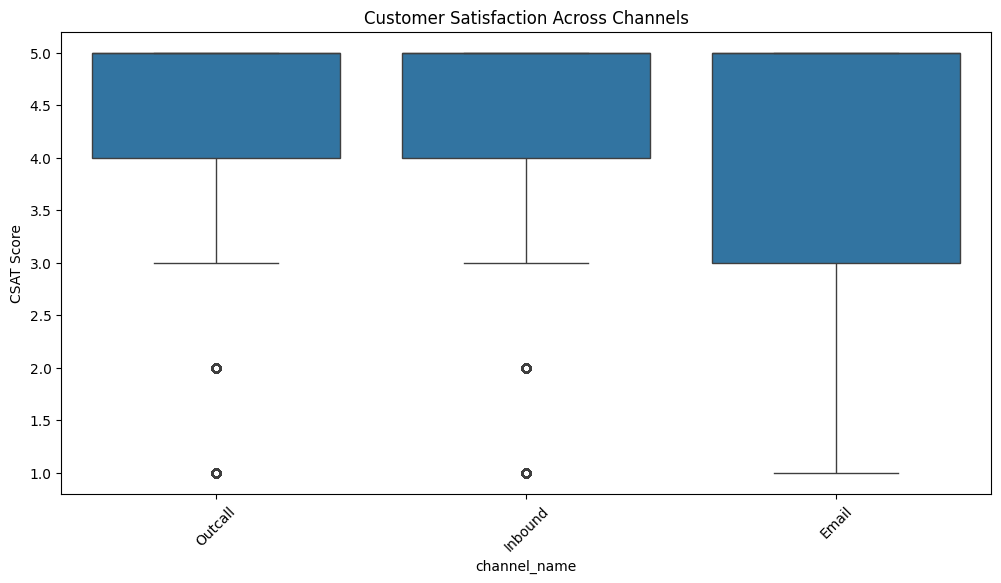

In [ ]:
#Satisfaction across different support channels/ differnet mediums;
plt.figure(figsize = (12,6))
sns.boxplot(x = "channel_name", y = "CSAT Score" , data = df)
plt.xticks(rotation = 45)
plt.title("Customer Satisfaction Across Channels")
plt.show()

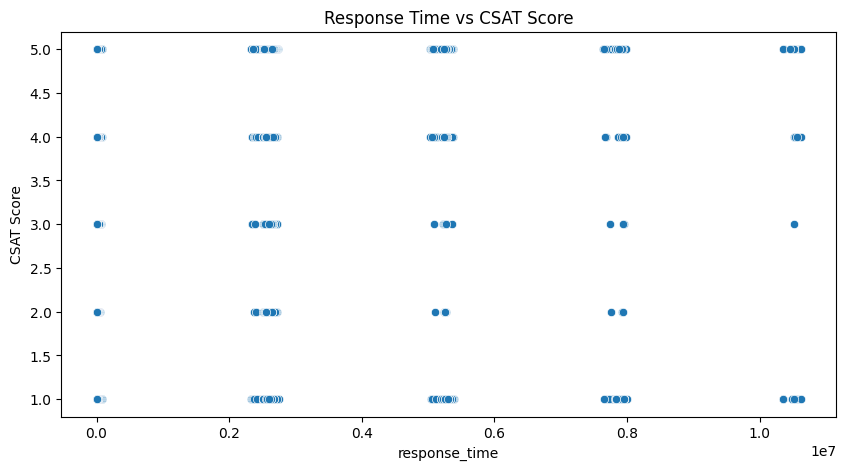

In [ ]:
# Comparing Response Time vs Csat Score
plt.figure(figsize = (10 , 5))
sns.scatterplot(x = "response_time" , y = "CSAT Score" , data = df)
plt.title("Response Time vs CSAT Score")
plt.show()

# **#Model traning**

In [ ]:
#Selcting relevant features for predictions
features = ["response_time" , "Item_price", "channel_name", "category" , "Tenure Bucket" , "Agent Shift"]
df_model = df[features + ["CSAT Score"]]
df_model = pd.get_dummies(df_model , drop_first = True) #One hot encoding for categorial features

In [ ]:
#Spitting Data Into Train and Test Sets
X = df_model.drop(columns=['CSAT Score'])
y = df_model['CSAT Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Training the Machine Learning Model**

In [ ]:
model = RandomForestClassifier(n_estimators = 100 , random_state = 42)
model.fit(X_train , y_train)

RandomForestClassifier(random_state=42)

#**Predicitons**

In [ ]:
y_pred = model.predict(X_test)

## **Model Performance Evaluation**

In [ ]:
print("Model Accuracy:" , accuracy_score(y_test , y_pred))
print(classification_report(y_test , y_pred))

Model Accuracy: 0.6538819695029682
              precision    recall  f1-score   support

           1       0.23      0.09      0.13      2241
           2       0.01      0.00      0.01       227
           3       0.04      0.01      0.02       503
           4       0.13      0.03      0.05      2277
           5       0.70      0.92      0.80     11934

    accuracy                           0.65     17182
   macro avg       0.23      0.21      0.20     17182
weighted avg       0.54      0.65      0.58     17182

